
# --------------------------------------- INITIALIZATION ---------------------------------------

# IMPORTING PYTHON PACKAGES

In [1]:
from glob import glob ## It is utilized for managing file paths and different files within Python. For more details on its usage and functionalities, please refer to >>> docs.python.org/3/library/glob.html
import rasterio as rio ## It is a module used for handling satellite imagery and various geospatial data to extract numerical data from image data. For more information, please refer to >>> rasterio.readthedocs.io
import numpy as np ## It is used for creating multi-dimensional arrays. For more information, please refer to >>> numpy.org
import earthpy.plot as ep ## It is used for plotting raster images. For more information, please refer to >>> earthpy.readthedocs.io
from skimage import io ## It is a module for image processing. For more details, please visit >>> scikit-image.org
import matplotlib.pyplot as plt ## It is a module for displaying images and various graphs. For more details, please visit >>> matplotlib.org
from matplotlib.colors import ListedColormap ## For defining the color boundaries used in image display
import pandas as pd ## Module to facilitate easier data management, organizing data into a table format (Data Frame) >>> pandas.pydata.org
import seaborn as sns ## This module is suitable for statistical graph visualization >>> seaborn.pydata.org

###  Module for scaling numerical data before model training, i.e., standardization >>> scikit-learn.org
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler

import warnings ## Module for managing Python kernel warning notifications
warnings.filterwarnings(action='ignore') ## Suppress all warnings from the system

# Set the PATH

In [2]:
SEC_1_POST_QPB_IMG_PATH = 'IMAGES/PB/1/' ## the directory where images are stored
SEC_2_POST_QPB_IMG_PATH = 'IMAGES/PB/2/' ## the directory where images are stored

SEC_1_POST_QPB = "R1_T47QPB_20210228T034701_" ## the names of the files in the directory
SEC_2_POST_QPB = "R2_T47QPB_20210228T034701_" ## the names of the files in the directory

SEC_1_POST_QPB_GROUNDTRUTH_PATH = "R1_T47QPB_20210228T034701_GT_20m.tif" #File name of the ground truth image
SEC_2_POST_QPB_GROUNDTRUTH_PATH = "R2_T47QPB_20210228T034701_GT_20m.tif" #File name of the ground truth image

SEC_1_POST_QPB_IMG_SET = glob(f'{SEC_1_POST_QPB_IMG_PATH }{SEC_1_POST_QPB}*B?*.tif') #ใUse glob to collect paths and names of files specified
SEC_2_POST_QPB_IMG_SET = glob(f'{SEC_2_POST_QPB_IMG_PATH }{SEC_2_POST_QPB}*B?*.tif') #Use glob to collect paths and names of files specified

SEC_1_POST_QPB_IMG_SET.sort() ## Sort the images according to the spectral band order of Sentinel-2 satellite
SEC_2_POST_QPB_IMG_SET.sort() ## Sort the images according to the spectral band order of Sentinel-2 satellite

# --------------------------------------- DATA ACQUISITION ---------------------------------------

# Import image data using Rasterio

In [3]:
SEC_1_POST_QPB_RASTER = np.array([]) ## Create a numpy array to store all the images converted to raster
SEC_2_POST_QPB_RASTER = np.array([]) ## Create a numpy array to store all the images converted to raster

SEC_1_BUFF = [] ## Create a list to store raster data of each image
SEC_2_BUFF = [] ## Create a list to store raster data of each image

for _ in SEC_1_POST_QPB_IMG_SET:
    with rio.open(_, 'r') as img: ## Using rio to read satellite imagery and convert it into numerical form
        SEC_1_BUFF.append(img.read(1))
        
for _ in SEC_2_POST_QPB_IMG_SET:
    with rio.open(_, 'r') as img: ## Using rio to read satellite imagery and convert it into numerical form
        SEC_2_BUFF.append(img.read(1))
        
SEC_1_POST_QPB_RASTER = np.stack(SEC_1_BUFF) ## Convert the list storing raster data of each image into multi-dimensional arrays
SEC_2_POST_QPB_RASTER = np.stack(SEC_2_BUFF) ## Convert the list storing raster data of each image into multi-dimensional arrays

Available_bands = [ 'Blue', 'Green', 'Red','VRE1','VRE2','VRE3', 'NIR', 'SWIR1', 'SWIR2'] ## List of bands used in the work, ordered accordingly

# Import the ground truth image(Ground Truth)

In [4]:
SEC_1_POST_QPB_GROUNDTRUTH = io.imread( ## Import the ground truth image using Skimage
    SEC_1_POST_QPB_IMG_PATH + SEC_1_POST_QPB_GROUNDTRUTH_PATH, ##  Specify the file path
    as_gray=True ## Read the image in grayscale mode
) 
SEC_2_POST_QPB_GROUNDTRUTH = io.imread( ## Import the ground truth image using Skimage
    SEC_2_POST_QPB_IMG_PATH + SEC_2_POST_QPB_GROUNDTRUTH_PATH, ##  Specify the file path
    as_gray=True ## Read the image in grayscale mode
) 

SEC_1_POST_QPB_GROUNDTRUTH_GRAY = np.array(SEC_1_POST_QPB_GROUNDTRUTH) ## Convert the list to a numpy array
SEC_2_POST_QPB_GROUNDTRUTH_GRAY = np.array(SEC_2_POST_QPB_GROUNDTRUTH) ## Convert the list to a numpy array

intensity = 0.6 ## Set the intensity level from 0 to 1, where 0 represents the highest intensity

SEC_1_POST_QPB_GROUNDTRUTH_MASK = (SEC_1_POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## Select only pixels with intensity values lower than the specified intensity
SEC_2_POST_QPB_GROUNDTRUTH_MASK = (SEC_2_POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## Select only pixels with intensity values lower than the specified intensity

# --------------------------------------- DATA EXPLORATION ---------------------------------------

# Convert the array to a DataFrame

### Image data

In [5]:
SEC_1_POST_QPB_DF =  np.moveaxis(SEC_1_POST_QPB_RASTER, 0, -1) ## Change the dimensions of the array
SEC_2_POST_QPB_DF =  np.moveaxis(SEC_2_POST_QPB_RASTER, 0, -1) ## Change the dimensions of the array

SEC_1_POST_QPB_DF = SEC_1_POST_QPB_DF.reshape(-1, 9) ## Reshape the array
SEC_2_POST_QPB_DF = SEC_2_POST_QPB_DF.reshape(-1, 9) ## Reshape the array

SEC_1_POST_QPB_DF = pd.DataFrame(SEC_1_POST_QPB_DF) ## Convert the array to a DataFrame
SEC_2_POST_QPB_DF = pd.DataFrame(SEC_2_POST_QPB_DF) ## Convert the array to a DataFrame

### Ground Truth

In [6]:
SEC_1_POST_QPB_GROUNDTRUTH_DF = SEC_1_POST_QPB_GROUNDTRUTH_MASK.reshape(-1)
SEC_2_POST_QPB_GROUNDTRUTH_DF = SEC_2_POST_QPB_GROUNDTRUTH_MASK.reshape(-1)

SEC_1_POST_QPB_GROUNDTRUTH_DF = pd.DataFrame(SEC_1_POST_QPB_GROUNDTRUTH_DF)
SEC_2_POST_QPB_GROUNDTRUTH_DF = pd.DataFrame(SEC_2_POST_QPB_GROUNDTRUTH_DF)

## Rename Feature

### Image Data

In [7]:
for _ in range(0,len(Available_bands)): ## Loop to rename according to the list of bands specified initially (Available_bands)
    SEC_1_POST_QPB_DF = SEC_1_POST_QPB_DF.rename(columns={_: Available_bands[_]})
    SEC_2_POST_QPB_DF = SEC_2_POST_QPB_DF.rename(columns={_: Available_bands[_]})

### Ground Truth

In [8]:
SEC_1_POST_QPB_GROUNDTRUTH_DF = SEC_1_POST_QPB_GROUNDTRUTH_DF.rename(columns={0: 'Label'})
SEC_2_POST_QPB_GROUNDTRUTH_DF = SEC_2_POST_QPB_GROUNDTRUTH_DF.rename(columns={0: 'Label'})

# --------------------------------------- DATA PREPARATION ---------------------------------------

In [9]:
SEC_1_DF = SEC_1_POST_QPB_DF ## Image data
SEC_2_DF = SEC_2_POST_QPB_DF ## Image data

SEC_1_LABEL = SEC_1_POST_QPB_GROUNDTRUTH_DF ## Ground Truth
SEC_2_LABEL = SEC_2_POST_QPB_GROUNDTRUTH_DF ## Ground Truth

# 1. Feature engineering

## 1.1 Extracting new features from spectral reflectance values in the DataFrame

#### Geographical indices calculated from the reflectance values of each spectral band

In [ ]:
'''
>>> Normalized Difference Vegetation Index (NDVI)
It is an index that uses the red spectral band and the near-infrared band, highly correlated with vegetation. 
High NDVI values correspond to areas with a high amount of reflected near-infrared radiation
Additionally, increased reflectance in the near-infrared spectrum corresponds to denser and healthier vegetation types (GU, 2019)

**NDVI Formula  (Sentinel-2) = (NIR - Red) / (NIR + Red) 
'''

SEC_1_DF['NDVI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) ## Normalized Difference Vegetation Index
SEC_2_DF['NDVI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) ## Normalized Difference Vegetation Index

'''
>>> Green Normalized Difference Vegetation Index (GNDVI)
It's a modified version of NDVI designed to be more sensitive to changes in chlorophyll content in vegetation (Gitelson et al. 1996)

**GNDVI Formula (Sentinel-2) = (NIR-Green) /(NIR+Green)

'''

SEC_1_DF['GNDVI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) ## Green Normalized Difference Vegetation Index
SEC_2_DF['GNDVI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) ## Green Normalized Difference Vegetation Index

'''
>>> Enhanced Vegetation Index (EVI)
EVI is similar to the Normalized Difference Vegetation Index (NDVI) and can be used to estimate the amount of vegetation greenness 
However, EVI addresses some atmospheric conditions and background noise issues and is more sensitive in areas with dense vegetation cover. (USGS, 2019)

**EVI Formula (Sentinel-2) = 2.5 * ((NIR - Red) / (NIR + 6 * Red - 7.5 * Blue + 1))
'''

SEC_1_DF['EVI'] = SEC_1_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) ## Enhanced Vegetation Index
SEC_2_DF['EVI'] = SEC_2_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) ## Enhanced Vegetation Index

'''
>>> Advanced Vegetation Index (AVI)
AVI is a numerical indicator similar to NDVI that uses the red and near-infrared spectral bands. It is used in vegetation studies to monitor changes in crop growth.
By combining AVI and NDVI over various time periods, users can differentiate plant species and distinguish characteristics/parameters
Technologically (GU, 2019)

**AVI Formula (Sentinel-2) = (NIR * (1 – Red)*(NIR – Red))^(1/3)
'''

SEC_1_DF['AVI'] = SEC_1_DF.apply(lambda row: ((row.NIR* (1 - row.Red) * (row.NIR - row.Red))**(1/3)), axis=1) #
SEC_2_DF['AVI'] = SEC_2_DF.apply(lambda row: ((row.NIR* (1 - row.Red) * (row.NIR - row.Red))**(1/3)), axis=1) #

'''
>>> Soil Adjusted Vegetation Index (SAVI)
SAVI is used to adjust the Normalized Difference Vegetation Index (NDVI) for the influence of soil brightness in areas with low vegetation cover
The SAVI obtained from the reflection of Landsat surface is calculated as the ratio between R and NIR values, with a soil brightness correction factor (L) set to 0.5.
To accommodate predominantly vegetated areas (USGS, 2019)

**SAVI Formula (Sentinel 2) = (NIR - Red) / (NIR + Red + 0.428) * (1.428)
'''

SEC_1_DF['SAVI'] = SEC_1_DF.apply(lambda row: (((row.NIR - row.Red) / (row.NIR + row.Red + 0.428)) * (1.428)), axis=1) ## Soil Adjusted Vegetation Index
SEC_2_DF['SAVI'] = SEC_2_DF.apply(lambda row: (((row.NIR - row.Red) / (row.NIR + row.Red + 0.428)) * (1.428)), axis=1) ## Soil Adjusted Vegetation Index

'''
>>> Normalized Difference Moisture Index (NDMI)
NDMI NDMI is used to determine vegetation moisture content, calculated as the ratio between NIR and SWIR values in the original format  (USGS, 2019)

**NDMI Formula (Sentinel 2) = (NIR - SWIR1) / (NIR + SWIR1)
'''

SEC_1_DF['NDMI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) ## Normalized Difference Moisture Index
SEC_2_DF['NDMI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) ## Normalized Difference Moisture Index

'''
>>> Moisture Stress Index (MSI)
This index measures the light reflectance sensitivity to increasing leaf water content (Welikhe et al., 2017)

**MSI Formula (Sentinel 2) = SWIR1 / NIR
'''

SEC_1_DF['MSI'] = SEC_1_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) ## Moisture Stress Index
SEC_2_DF['MSI'] = SEC_2_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) ## Moisture Stress Index

'''
>>> Normalized Burned Ratio Index (NBRI)
NBRI utilizes the near-infrared (NIR) and shortwave infrared (SWIR) spectral bands, which are sensitive to vegetation changes
To detect burnt areas and monitor environmental recovery (GU, 2019)

**NBRI Formula (Sentinel 2) = (NIR - SWIR2) / (NIR + SWIR2)
'''

SEC_1_DF['NBRI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) ## Normalized Burned Ratio Index
SEC_2_DF['NBRI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) ## Normalized Burned Ratio Index

'''
>>> Bare Soil Index (BSI)
The Bare Soil Index (BSI) is a numerical index that combines spectral bands including blue, red, near-infrared, and shortwave infrared
To detect changes in soil composition, shortwave infrared and red spectral bands are used to determine the quantity of mineral components in the soil
While the blue spectral band and near-infrared spectral band are used to enhance the appearance of vegetation (GU, 2019)

**BSI Formula (Sentinel 2) = (SWIR1 + Blue) – (NIR + Red) / (SWIR1 + Blue) + (NIR + Red)
'''

SEC_1_DF['BSI'] = SEC_1_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) ## Bare Soil Index
SEC_2_DF['BSI'] = SEC_2_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) ## Bare Soil Index

'''
>>> Normalized Difference Water Index (NDWI)
The Normalize Difference Water Index (NDWI) is used for water analysis. This index utilizes the green and near-infrared bands of the remotely sensed image
The NDWI can effectively detect large water bodies, but it is sensitive to moist soil surfaces, which may produce results similar to water bodies
The NDWI can be used in conjunction with NDVI products to assess the context of areas undergoing significant changes. (Bahadur, 2018)

**NDWI Formula (Sentinel 2) = (NIR - SWIR) / (NIR + SWIR)
'''

SEC_1_DF['NDWI'] = SEC_1_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) ## Normalized Difference Water Index
SEC_2_DF['NDWI'] = SEC_2_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) ## Normalized Difference Water Index

'''
>>> Atmospherically Resistant Vegetation Index (ARVI)
This is an index that has been refined to correct for atmospheric influences. It is most useful in regions with high levels of atmospheric haze and in areas with mixed hotspots
**ARVI Formula (Sentinel 2) = (NIR - (2 * Red) + Blue) / (NIR + (2 * Red) + Blue)
'''

SEC_1_DF['ARVI'] = SEC_1_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) ## Atmospherically Resistant Vegetation Index
SEC_2_DF['ARVI'] = SEC_2_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) ## Atmospherically Resistant Vegetation Index

'''
>>> Structure Insensitive Pigment Index (SIPI)
For analyzing vegetation with varied canopy structures, it evaluates the ratio of carotenoids to chlorophyll: the value increases with the density of the vegetation. (EOS, 2019).
**SIPI Formula (Sentinel 2) = (NIR - Blue) / (NIR - Red)
'''

SEC_1_DF['SIPI'] = SEC_1_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index
SEC_2_DF['SIPI'] = SEC_2_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index

In [ ]:
display(SEC_1_DF)

In [ ]:
display(SEC_2_DF)

## Merging all training image data together

#### Combining images and their corresponding ground truths together

In [13]:
M_SEC_1_DF = pd.concat([SEC_1_DF, SEC_1_LABEL], ## Combining images and their corresponding ground truths together
                   axis=1, ## Combine along the columns
                   sort=False ## Do not sort the data
                  )

M_SEC_2_DF = pd.concat([SEC_2_DF, SEC_2_LABEL], ## Combining images and their corresponding ground truths together
                   axis=1, ## Combine along the columns
                   sort=False ## Do not sort the data
                  )

In [14]:
M_SEC_2_DF

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,AVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,16,18,22,26,67,83,100,79,44,0.639344,...,NaN,0.909792,0.117318,0.790000,0.388889,215.851485,-0.694915,0.450000,1.076923,0
1,17,17,22,23,63,78,96,72,39,0.627119,...,NaN,0.892289,0.142857,0.750000,0.422222,205.797872,-0.699115,0.439490,1.067568,0
2,15,17,20,23,64,79,92,66,36,0.642857,...,NaN,0.914505,0.164557,0.717391,0.437500,191.755814,-0.688073,0.455782,1.069444,0
3,16,17,20,23,58,74,85,67,39,0.619048,...,NaN,0.880411,0.118421,0.788235,0.370968,186.839080,-0.666667,0.432624,1.061538,0
4,16,16,21,18,48,57,72,51,28,0.548387,...,NaN,0.779509,0.170732,0.708333,0.440000,158.777778,-0.636364,0.353846,1.098039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,20,25,37,34,63,57,92,101,80,0.426357,...,NaN,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091,0
249996,21,25,40,35,57,55,84,106,87,0.354839,...,NaN,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818,0
249997,22,25,37,38,55,59,79,116,97,0.362069,...,NaN,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143,0
249998,21,23,31,35,52,58,72,111,92,0.398058,...,NaN,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902,0


#### Merge the two datasets together

In [15]:
DF_SET = pd.concat([M_SEC_1_DF, M_SEC_2_DF])
DF_SET = DF_SET.reset_index(drop=True)
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,AVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,19,24,41,43,62,73,86,135,106,0.354331,...,NaN,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889,0
1,22,28,53,53,69,74,92,136,108,0.268966,...,NaN,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872,0
2,20,25,46,49,68,74,89,132,102,0.318519,...,NaN,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651,0
3,21,28,51,51,67,70,90,128,101,0.276596,...,NaN,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231,0
4,19,23,41,42,57,62,75,118,98,0.293103,...,NaN,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20,25,37,34,63,57,92,101,80,0.426357,...,NaN,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091,0
499996,21,25,40,35,57,55,84,106,87,0.354839,...,NaN,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818,0
499997,22,25,37,38,55,59,79,116,97,0.362069,...,NaN,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143,0
499998,21,23,31,35,52,58,72,111,92,0.398058,...,NaN,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902,0


# 2. DATA CLEANING

#### Check the data again

In [16]:
DF_SET.dtypes

Blue       uint8
Green      uint8
Red        uint8
VRE1       uint8
VRE2       uint8
VRE3       uint8
NIR        uint8
SWIR1      uint8
SWIR2      uint8
NDVI     float32
GNDVI    float32
EVI      float64
AVI      float64
SAVI     float64
NDMI     float64
MSI      float64
NBRI     float64
BSI      float64
NDWI     float64
ARVI     float64
SIPI     float64
Label      int64
dtype: object

## 2.1 Handling data that cannot be computed

#### Check for data with values that cannot be computed such as inf and nan

In [17]:
DF_SET.isin([np.inf, -np.inf, np.nan]).sum()

Blue          0
Green         0
Red           0
VRE1          0
VRE2          0
VRE3          0
NIR           0
SWIR1         0
SWIR2         0
NDVI          0
GNDVI         0
EVI           0
AVI      496623
SAVI          0
NDMI          0
MSI           0
NBRI          0
BSI           0
NDWI          0
ARVI          0
SIPI         52
Label         0
dtype: int64

#### Replace those values with NaN

In [18]:
DF_SET = DF_SET.replace([np.inf, -np.inf], np.nan) ## Replace those values with NaN if present
DF_SET.isnull().sum()

Blue          0
Green         0
Red           0
VRE1          0
VRE2          0
VRE3          0
NIR           0
SWIR1         0
SWIR2         0
NDVI          0
GNDVI         0
EVI           0
AVI      496623
SAVI          0
NDMI          0
MSI           0
NBRI          0
BSI           0
NDWI          0
ARVI          0
SIPI         52
Label         0
dtype: int64

## 2.1.1 Drop rows containing NaN values

### 2.1.1.1 Drop rows where all values are NaN

In [19]:
#DF_SET = DF_SET.dropna(axis='index')

#display(DF_SET)

### 2.1.1.2 Drop rows that have less than thresh_val non-NaN values

In [20]:
threshold = 50 ## Set the percentage threshold of NaN values that is acceptable

### Remove columns with more NaN values than the specified threshold

In [21]:
display(DF_SET[DF_SET.columns[DF_SET.isnull().mean()*100 > threshold]]) ## Display columns with more NaN values than the specified threshold

,AVI
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
499995,NaN
499996,NaN
499997,NaN
499998,NaN


In [22]:
DF_SET = DF_SET[DF_SET.columns[DF_SET.isnull().mean()*100 <= threshold]] ## Remove columns with more NaN values than the specified threshold
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,19,24,41,43,62,73,86,135,106,0.354331,...,0.001825,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889,0
1,22,28,53,53,69,74,92,136,108,0.268966,...,0.000951,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872,0
2,20,25,46,49,68,74,89,132,102,0.318519,...,0.001400,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651,0
3,21,28,51,51,67,70,90,128,101,0.276596,...,0.001061,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231,0
4,19,23,41,42,57,62,75,118,98,0.293103,...,0.001566,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20,25,37,34,63,57,92,101,80,0.426357,...,0.002265,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091,0
499996,21,25,40,35,57,55,84,106,87,0.354839,...,0.001709,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818,0
499997,22,25,37,38,55,59,79,116,97,0.362069,...,0.001821,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143,0
499998,21,23,31,35,52,58,72,111,92,0.398058,...,0.002542,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902,0


### Remove rows with more NaN values than the specified threshold.

In [23]:
display(DF_SET.loc[DF_SET.isnull().mean(axis=1) > threshold]) ## Display rows with more NaN values than the specified threshold

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label


In [24]:
DF_SET = DF_SET.loc[DF_SET.isnull().mean(axis=1) <= threshold] ## Remove rows with more NaN values than the specified threshold
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,19,24,41,43,62,73,86,135,106,0.354331,...,0.001825,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889,0
1,22,28,53,53,69,74,92,136,108,0.268966,...,0.000951,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872,0
2,20,25,46,49,68,74,89,132,102,0.318519,...,0.001400,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651,0
3,21,28,51,51,67,70,90,128,101,0.276596,...,0.001061,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231,0
4,19,23,41,42,57,62,75,118,98,0.293103,...,0.001566,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20,25,37,34,63,57,92,101,80,0.426357,...,0.002265,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091,0
499996,21,25,40,35,57,55,84,106,87,0.354839,...,0.001709,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818,0
499997,22,25,37,38,55,59,79,116,97,0.362069,...,0.001821,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143,0
499998,21,23,31,35,52,58,72,111,92,0.398058,...,0.002542,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902,0


## 2.1.2 Replace with statistical median value

In [25]:
DF_SET.mean()

Blue      17.210884
Green     20.292288
Red       34.381800
VRE1      35.424146
VRE2      53.612540
VRE3      62.602892
NIR       77.433844
SWIR1    104.401856
SWIR2     79.459426
NDVI       0.420783
GNDVI      0.579217
EVI        0.004172
SAVI       0.541677
NDMI      -0.140803
MSI        1.370518
NBRI       0.001398
BSI      232.719707
NDWI      -0.579217
ARVI       0.164027
SIPI       1.461118
Label      0.019168
dtype: float64

In [26]:
DF_SET.isnull().sum()

Blue      0
Green     0
Red       0
VRE1      0
VRE2      0
VRE3      0
NIR       0
SWIR1     0
SWIR2     0
NDVI      0
GNDVI     0
EVI       0
SAVI      0
NDMI      0
MSI       0
NBRI      0
BSI       0
NDWI      0
ARVI      0
SIPI     52
Label     0
dtype: int64

In [27]:
DF_SET = DF_SET.fillna(DF_SET.mean()) 
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,19,24,41,43,62,73,86,135,106,0.354331,...,0.001825,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889,0
1,22,28,53,53,69,74,92,136,108,0.268966,...,0.000951,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872,0
2,20,25,46,49,68,74,89,132,102,0.318519,...,0.001400,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651,0
3,21,28,51,51,67,70,90,128,101,0.276596,...,0.001061,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231,0
4,19,23,41,42,57,62,75,118,98,0.293103,...,0.001566,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20,25,37,34,63,57,92,101,80,0.426357,...,0.002265,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091,0
499996,21,25,40,35,57,55,84,106,87,0.354839,...,0.001709,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818,0
499997,22,25,37,38,55,59,79,116,97,0.362069,...,0.001821,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143,0
499998,21,23,31,35,52,58,72,111,92,0.398058,...,0.002542,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902,0


## 2.2 Handle outliers

### 2.2.1 Separate image data and ground truth

In [28]:
LABEL = DF_SET[['Label']]
DF_SET = DF_SET.drop(columns=['Label'])

display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,GNDVI,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI
0,19,24,41,43,62,73,86,135,106,0.354331,0.563636,0.001825,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889
1,22,28,53,53,69,74,92,136,108,0.268966,0.533333,0.000951,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872
2,20,25,46,49,68,74,89,132,102,0.318519,0.561404,0.001400,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651
3,21,28,51,51,67,70,90,128,101,0.276596,0.525424,0.001061,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231
4,19,23,41,42,57,62,75,118,98,0.293103,0.530612,0.001566,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20,25,37,34,63,57,92,101,80,0.426357,0.572650,0.002265,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091
499996,21,25,40,35,57,55,84,106,87,0.354839,0.541284,0.001709,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818
499997,22,25,37,38,55,59,79,116,97,0.362069,0.519231,0.001821,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143
499998,21,23,31,35,52,58,72,111,92,0.398058,0.515789,0.002542,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902


### 2.2.2 Replace outliers with NaN

In [29]:
for _ in DF_SET.columns:
    for __ in ([_]):
        q75,q25 = np.percentile(DF_SET.loc[:,__],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        DF_SET.loc[DF_SET[__] < min,__] = np.nan
        DF_SET.loc[DF_SET[__] > max,__] = np.nan  
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,GNDVI,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI
0,19.0,24.0,41.0,43.0,62.0,73.0,86.0,135.0,106.0,0.354331,0.563636,0.001825,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889
1,22.0,28.0,53.0,53.0,69.0,74.0,92.0,136.0,108.0,0.268966,0.533333,0.000951,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872
2,20.0,25.0,46.0,49.0,68.0,74.0,89.0,132.0,102.0,0.318519,0.561404,0.001400,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651
3,21.0,28.0,51.0,51.0,67.0,70.0,90.0,128.0,101.0,0.276596,0.525424,0.001061,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231
4,19.0,23.0,41.0,42.0,57.0,62.0,75.0,118.0,98.0,0.293103,0.530612,0.001566,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20.0,25.0,37.0,34.0,63.0,57.0,92.0,101.0,80.0,0.426357,0.572650,0.002265,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091
499996,21.0,25.0,40.0,35.0,57.0,55.0,84.0,106.0,87.0,0.354839,0.541284,0.001709,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818
499997,22.0,25.0,37.0,38.0,55.0,59.0,79.0,116.0,97.0,0.362069,0.519231,0.001821,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143
499998,21.0,23.0,31.0,35.0,52.0,58.0,72.0,111.0,92.0,0.398058,0.515789,0.002542,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902


In [30]:
display(DF_SET.isnull().sum())

Blue      1723
Green     1533
Red       3852
VRE1      7398
VRE2     10745
VRE3      9860
NIR       8445
SWIR1     8947
SWIR2     9194
NDVI     13702
GNDVI     5812
EVI      55594
SAVI     15278
NDMI     22461
MSI       5569
NBRI     13147
BSI       9961
NDWI      5812
ARVI     26551
SIPI      8677
dtype: int64

### 2.2.3 Remove rows and columns with excessive NaN values

In [31]:
DF_SET = pd.concat([DF_SET, LABEL], axis=1, sort=False)

In [32]:
threshold = 50 ## Set the percentage threshold of acceptable NaN values

### Remove rows with more NaN values than the specified threshold

In [33]:
display(DF_SET[DF_SET.columns[DF_SET.isnull().mean()*100 > threshold]])

""
0
1
2
3
4
...
499995
499996
499997
499998


In [34]:
DF_SET = DF_SET[DF_SET.columns[DF_SET.isnull().mean()*100 <= threshold]]
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,19.0,24.0,41.0,43.0,62.0,73.0,86.0,135.0,106.0,0.354331,...,0.001825,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889,0
1,22.0,28.0,53.0,53.0,69.0,74.0,92.0,136.0,108.0,0.268966,...,0.000951,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872,0
2,20.0,25.0,46.0,49.0,68.0,74.0,89.0,132.0,102.0,0.318519,...,0.001400,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651,0
3,21.0,28.0,51.0,51.0,67.0,70.0,90.0,128.0,101.0,0.276596,...,0.001061,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231,0
4,19.0,23.0,41.0,42.0,57.0,62.0,75.0,118.0,98.0,0.293103,...,0.001566,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20.0,25.0,37.0,34.0,63.0,57.0,92.0,101.0,80.0,0.426357,...,0.002265,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091,0
499996,21.0,25.0,40.0,35.0,57.0,55.0,84.0,106.0,87.0,0.354839,...,0.001709,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818,0
499997,22.0,25.0,37.0,38.0,55.0,59.0,79.0,116.0,97.0,0.362069,...,0.001821,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143,0
499998,21.0,23.0,31.0,35.0,52.0,58.0,72.0,111.0,92.0,0.398058,...,0.002542,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902,0


### Remove rows with more NaN values than the specified threshold

In [35]:
display(DF_SET.loc[DF_SET.isnull().mean(axis=1) > threshold]) 

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label


In [36]:
DF_SET = DF_SET.loc[DF_SET.isnull().mean(axis=1) <= threshold] 
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,19.0,24.0,41.0,43.0,62.0,73.0,86.0,135.0,106.0,0.354331,...,0.001825,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889,0
1,22.0,28.0,53.0,53.0,69.0,74.0,92.0,136.0,108.0,0.268966,...,0.000951,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872,0
2,20.0,25.0,46.0,49.0,68.0,74.0,89.0,132.0,102.0,0.318519,...,0.001400,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651,0
3,21.0,28.0,51.0,51.0,67.0,70.0,90.0,128.0,101.0,0.276596,...,0.001061,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231,0
4,19.0,23.0,41.0,42.0,57.0,62.0,75.0,118.0,98.0,0.293103,...,0.001566,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20.0,25.0,37.0,34.0,63.0,57.0,92.0,101.0,80.0,0.426357,...,0.002265,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091,0
499996,21.0,25.0,40.0,35.0,57.0,55.0,84.0,106.0,87.0,0.354839,...,0.001709,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818,0
499997,22.0,25.0,37.0,38.0,55.0,59.0,79.0,116.0,97.0,0.362069,...,0.001821,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143,0
499998,21.0,23.0,31.0,35.0,52.0,58.0,72.0,111.0,92.0,0.398058,...,0.002542,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902,0


### Replace remaining NaN values with the mean of each column

In [37]:
DF_SET = DF_SET.fillna(DF_SET.mean()) 
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,19.0,24.0,41.0,43.0,62.0,73.0,86.0,135.0,106.0,0.354331,...,0.001825,0.504285,-0.221719,1.569767,-0.104167,280.403409,-0.563636,0.122995,1.488889,0
1,22.0,28.0,53.0,53.0,69.0,74.0,92.0,136.0,108.0,0.268966,...,0.000951,0.382952,-0.192982,1.478261,-0.080000,302.396825,-0.533333,0.036364,1.794872,0
2,20.0,25.0,46.0,49.0,68.0,74.0,89.0,132.0,102.0,0.318519,...,0.001400,0.453407,-0.194570,1.483146,-0.068063,286.387640,-0.561404,0.084577,1.604651,0
3,21.0,28.0,51.0,51.0,67.0,70.0,90.0,128.0,101.0,0.276596,...,0.001061,0.393783,-0.174312,1.422222,-0.057592,289.379888,-0.525424,0.042254,1.769231,0
4,19.0,23.0,41.0,42.0,57.0,62.0,75.0,118.0,98.0,0.293103,...,0.001566,0.417013,-0.222798,1.573333,-0.132948,252.408805,-0.530612,0.068182,1.647059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20.0,25.0,37.0,34.0,63.0,57.0,92.0,101.0,80.0,0.426357,...,0.002265,0.606824,-0.046632,1.097826,0.069767,249.188406,-0.572650,0.204301,1.309091,0
499996,21.0,25.0,40.0,35.0,57.0,55.0,84.0,106.0,87.0,0.354839,...,0.001709,0.504967,-0.115789,1.261905,-0.017544,250.280822,-0.541284,0.135135,1.431818,0
499997,22.0,25.0,37.0,38.0,55.0,59.0,79.0,116.0,97.0,0.362069,...,0.001821,0.515134,-0.189744,1.468354,-0.102273,253.339869,-0.519231,0.154286,1.357143,0
499998,21.0,23.0,31.0,35.0,52.0,58.0,72.0,111.0,92.0,0.398058,...,0.002542,0.566075,-0.213115,1.541667,-0.121951,234.345070,-0.515789,0.200000,1.243902,0


### Display boxplot after removing outliers

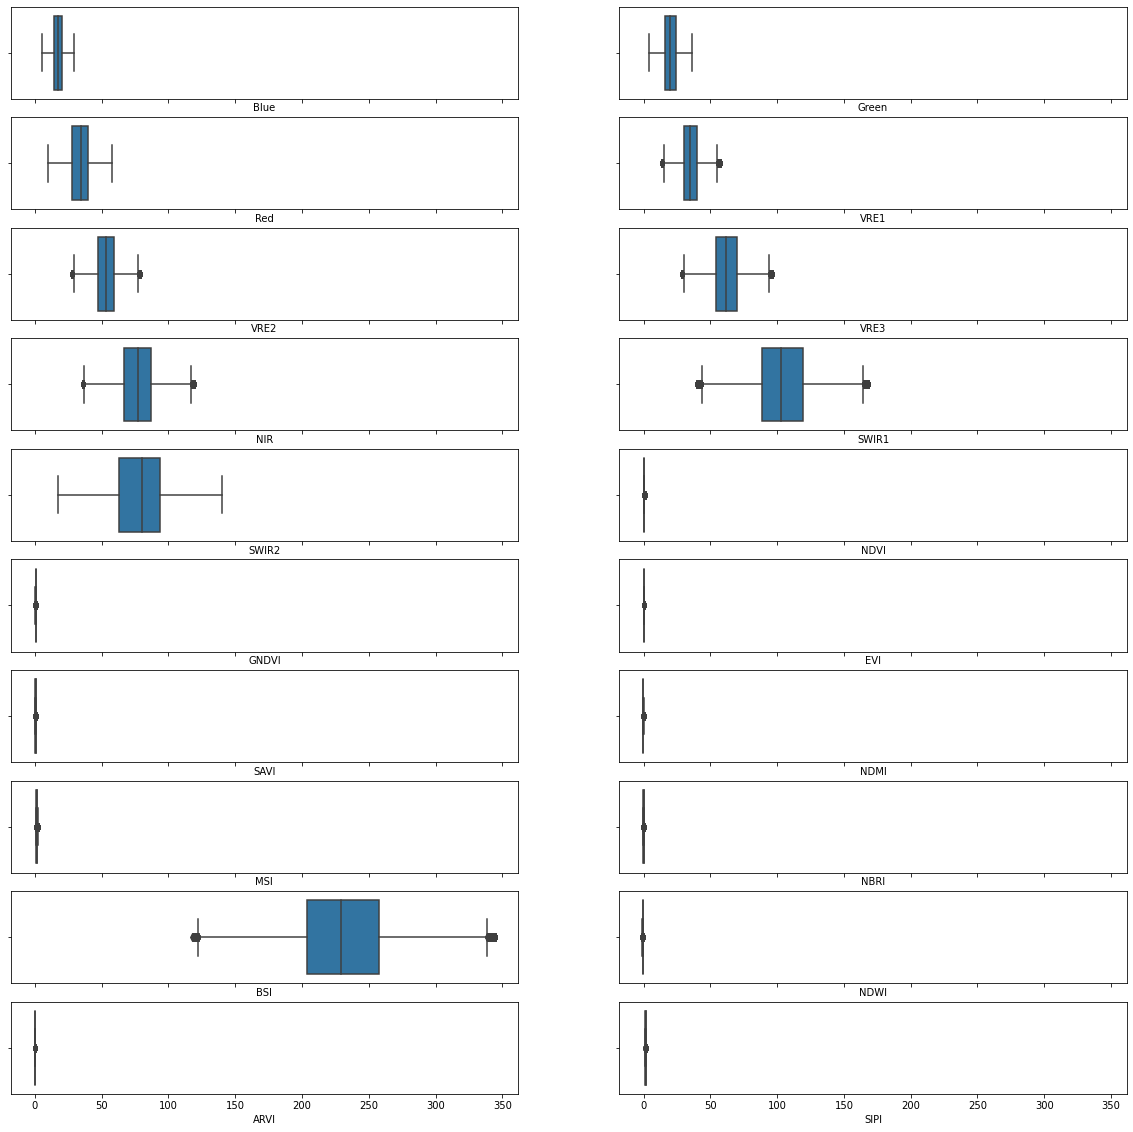

In [38]:
f, axes = plt.subplots(10, 2, figsize=(20, 20), sharex=True) 

for ax, feature in zip(axes.flat, DF_SET.columns):
    sns.boxplot(DF_SET[feature], ax=ax)

### Calculate correlation matrix after feature extraction

<AxesSubplot:>

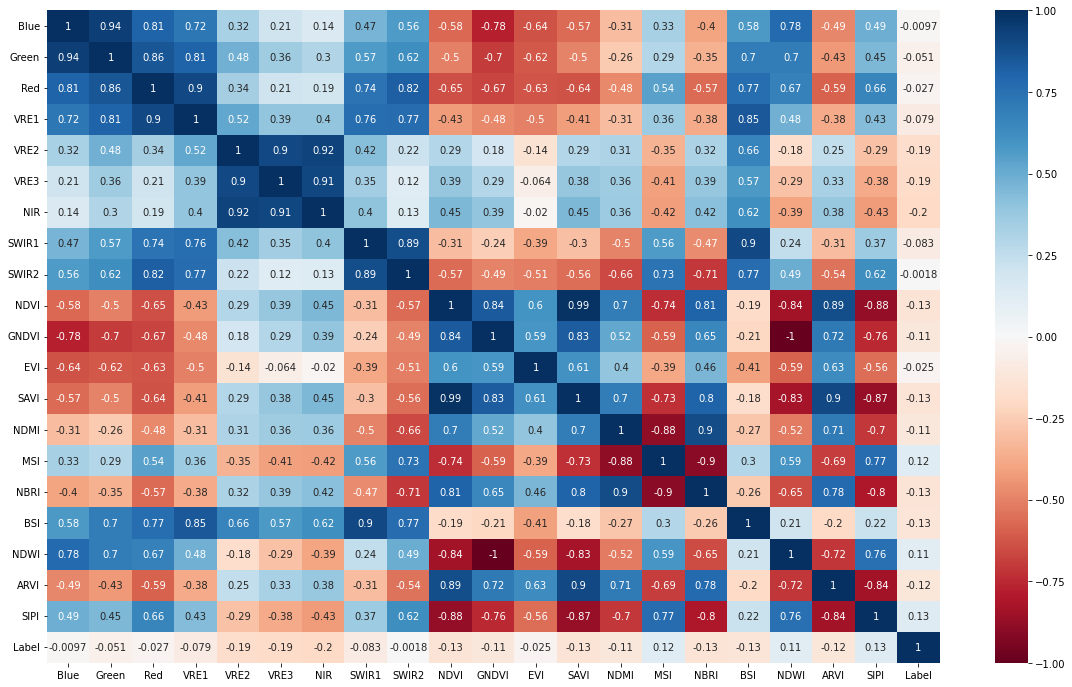

In [39]:
corr = DF_SET.corr() 

plt.figure(figsize=(20, 12))

sns.heatmap(corr, 
            cmap="RdBu", 
            vmin=-1,
            vmax=1,
            annot=True 
           )

# 3. Handling Class Imbalance (CLASSES BALANCING)

## 3.1 Checking the Count of Each Class

In [40]:
class_0_num = len(DF_SET[DF_SET.Label == 0]) ## Number of answers that are unburn
class_1_num = len(DF_SET[DF_SET.Label == 1]) ## Number of answers that are burnt
rows_num = len(DF_SET.index) ## Total number of rows

print(f'Number of row: {rows_num}')
print(f'Number of Unburn class: {class_0_num} ({round((class_0_num/rows_num)*100,2)} %)')
print(f'Number of Burnt class: {class_1_num} ({round((class_1_num/rows_num)*100,2)} %)')

Number of row: 500000
Number of Unburn class: 490416 (98.08 %)
Number of Burnt class: 9584 (1.92 %)


## 3.2 Reduce the number of answers that are greater to be equal to the number of answers that are lesser (DOWN SAMPLE)

### Separate answers into separate data for each answer

In [41]:
DF_CLASS_1 = DF_SET.query("Label == 1") ## Create a new DataFrame by filtering only the burnt labels

DF_CLASS_0 = DF_SET.query("Label == 0").sample(n=len(DF_CLASS_1),random_state=1) ## Create a new DataFrame by randomly sampling the unburnt labels in the same quantity as the burnt labels

print("Number of Unburn class: ",len(DF_CLASS_1.index))
print("Number of Burnt class: ",len(DF_CLASS_0.index))

Number of Unburn class:  9584
Number of Burnt class:  9584


### Merge the data together again

In [42]:
DF_SET = pd.concat([DF_CLASS_0, DF_CLASS_1])
DF_SET = DF_SET.sample(len(DF_CLASS_0)+len(DF_CLASS_1)) ## Randomize the row positions
DF_SET = DF_SET.reset_index(drop=True) ## Reset the index
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,11.0,13.0,30.0,29.0,43.0,52.000000,69.000000,125.0,92.0,0.393939,...,0.004815,0.560124,-0.288660,1.811594,-0.142857,234.483871,-0.682927,0.142857,1.487179,0
1,18.0,18.0,32.0,30.0,38.0,43.000000,54.000000,90.0,78.0,0.255814,...,0.001969,0.363493,-0.250000,1.666667,-0.181818,193.409836,-0.500000,0.058824,1.636364,1
2,17.0,20.0,34.0,33.0,45.0,51.000000,62.000000,93.0,81.0,0.291667,...,0.002158,0.414651,-0.200000,1.500000,-0.132867,205.377953,-0.512195,0.074830,1.607143,1
3,21.0,21.0,29.0,27.0,39.0,43.000000,50.000000,68.0,56.0,0.265823,...,0.001982,0.377549,-0.152542,1.360000,-0.056604,167.268041,-0.408451,0.100775,1.380952,1
4,15.0,16.0,28.0,29.0,41.0,47.000000,63.000000,88.0,68.0,0.384615,...,0.003866,0.546660,-0.165563,1.396825,-0.038168,193.327586,-0.594937,0.164179,1.371429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19163,20.0,29.0,48.0,53.0,75.0,90.000000,102.000000,159.0,138.0,0.360000,...,0.001470,0.512617,-0.218391,1.558824,-0.150000,328.410628,-0.557252,0.119266,1.518519,0
19164,9.0,12.0,24.0,24.0,34.0,38.000000,44.000000,78.0,69.0,0.294118,...,0.006061,0.417373,-0.278689,1.772727,-0.221239,154.480392,-0.571429,0.049505,1.750000,1
19165,21.0,23.0,42.0,41.0,51.0,58.000000,75.000000,123.0,108.0,0.282051,...,0.001342,0.401301,-0.242424,1.640000,-0.180328,260.418182,-0.530612,0.066667,1.636364,1
19166,11.0,14.0,28.0,30.0,42.0,50.000000,63.000000,93.0,73.0,0.384615,...,0.005155,0.546660,-0.192308,1.476190,-0.073529,194.388430,-0.636364,0.138462,1.485714,0


# 4. Standardizing the data (DATA SCALING)

## 4.1 Separate Ground truth from the DataFrame

In [43]:
LABEL = DF_SET[['Label']] ## Create a DataFrame to store Ground truth
DF_SET = DF_SET.drop(columns=['Label']) ## Remove it from the main dataset
display(DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,GNDVI,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI
0,11.0,13.0,30.0,29.0,43.0,52.000000,69.000000,125.0,92.0,0.393939,0.682927,0.004815,0.560124,-0.288660,1.811594,-0.142857,234.483871,-0.682927,0.142857,1.487179
1,18.0,18.0,32.0,30.0,38.0,43.000000,54.000000,90.0,78.0,0.255814,0.500000,0.001969,0.363493,-0.250000,1.666667,-0.181818,193.409836,-0.500000,0.058824,1.636364
2,17.0,20.0,34.0,33.0,45.0,51.000000,62.000000,93.0,81.0,0.291667,0.512195,0.002158,0.414651,-0.200000,1.500000,-0.132867,205.377953,-0.512195,0.074830,1.607143
3,21.0,21.0,29.0,27.0,39.0,43.000000,50.000000,68.0,56.0,0.265823,0.408451,0.001982,0.377549,-0.152542,1.360000,-0.056604,167.268041,-0.408451,0.100775,1.380952
4,15.0,16.0,28.0,29.0,41.0,47.000000,63.000000,88.0,68.0,0.384615,0.594937,0.003866,0.546660,-0.165563,1.396825,-0.038168,193.327586,-0.594937,0.164179,1.371429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19163,20.0,29.0,48.0,53.0,75.0,90.000000,102.000000,159.0,138.0,0.360000,0.557252,0.001470,0.512617,-0.218391,1.558824,-0.150000,328.410628,-0.557252,0.119266,1.518519
19164,9.0,12.0,24.0,24.0,34.0,38.000000,44.000000,78.0,69.0,0.294118,0.571429,0.006061,0.417373,-0.278689,1.772727,-0.221239,154.480392,-0.571429,0.049505,1.750000
19165,21.0,23.0,42.0,41.0,51.0,58.000000,75.000000,123.0,108.0,0.282051,0.530612,0.001342,0.401301,-0.242424,1.640000,-0.180328,260.418182,-0.530612,0.066667,1.636364
19166,11.0,14.0,28.0,30.0,42.0,50.000000,63.000000,93.0,73.0,0.384615,0.636364,0.005155,0.546660,-0.192308,1.476190,-0.073529,194.388430,-0.636364,0.138462,1.485714


## 4.2 Standardize the data using Scaler

#### StandardScaler 
Standardization follows a standard normal distribution (SND), making the mean (Mean) = 0 and adjusting the data to have a variance (Variance) = 1
<img src="DescriptionFigures/standardscaler.png" width=200 height=200>

#### MinMaxScaler 
The values in all features will be scaled to be within the range 0 to 1, or within the range -1 to 1 if there are negative values in the dataset
<img src="DescriptionFigures/maxminscaler.png" width=200 height=200>

#### RobustScaler 
You can remove outliers from the dataset similar to the process of removing outliers (Outlier)
<img src="DescriptionFigures/robustscaler.png" width=200 height=200>

In [44]:
#DF_SET_SCALED = RobustScaler().fit_transform(DF_SET) ## Handle outliers from the data using Robust Scaler

DF_SET_SCALED = StandardScaler().fit_transform(DF_SET) ## Standardize the data using Standard Scaler

#DF_SET_SCALED = MinMaxScaler().fit_transform(DF_SET) ## Scale the data to a specified range using MinMax Scaler

NORM_DF_SET = pd.DataFrame(DF_SET_SCALED)
display(NORM_DF_SET)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.525179,-1.306452,-0.459390,-0.518990,-0.400952,-0.160971,0.121967,1.361560,0.719928,0.649568,1.531490,1.624372,0.657394,-1.076562,1.183871,-0.380960,0.525004,-1.531490,0.409945,-0.306622
1,0.245977,-0.265294,-0.185088,-0.381686,-0.890667,-0.856506,-0.818082,-0.374541,-0.044225,-0.610226,-0.547192,-0.385098,-0.611819,-0.631548,0.638172,-0.646975,-0.531599,0.547192,-0.490697,0.353260
2,-0.007045,0.151170,0.089214,0.030226,-0.205066,-0.238253,-0.316723,-0.225732,0.119522,-0.283226,-0.408613,-0.251712,-0.281604,-0.055997,0.010618,-0.312751,-0.223727,0.408613,-0.319146,0.224009
3,1.005044,0.359401,-0.596541,-0.793597,-0.792724,-0.856506,-1.068762,-1.465805,-1.245035,-0.518939,-1.587509,-0.376044,-0.521089,0.490288,-0.516527,0.207954,-1.204080,1.587509,-0.041074,-0.776494
4,-0.513090,-0.681757,-0.733692,-0.518990,-0.596838,-0.547379,-0.254053,-0.473747,-0.590048,0.564527,0.531618,0.954498,0.570485,0.340409,-0.377868,0.333828,-0.533715,-0.531618,0.638466,-0.818621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19163,0.752021,2.025255,2.009328,2.776304,2.733221,2.775729,2.190075,3.048059,3.230714,0.340019,0.103388,-0.737817,0.350748,-0.267694,0.232108,-0.429729,2.941210,-0.103388,0.157104,-0.168001
19164,-2.031223,-1.514684,-1.282295,-1.205509,-1.282438,-1.242914,-1.444782,-0.969776,-0.535465,-0.260872,0.264484,2.504107,-0.264036,-0.961782,1.037525,-0.916128,-1.533034,-0.264484,-0.590570,0.855905
19165,1.005044,0.775865,1.186422,1.128657,0.382591,0.302718,0.497987,1.262354,1.593245,-0.370925,-0.199331,-0.828066,-0.367776,-0.544344,0.537763,-0.636799,1.192148,0.199331,-0.406637,0.353260
19166,-1.525179,-1.098221,-0.733692,-0.381686,-0.498895,-0.315535,-0.254053,-0.225732,-0.317136,0.564527,1.002371,1.864559,0.570485,0.032549,-0.079032,0.092390,-0.506425,-1.002371,0.362835,-0.313103


## 4.3 Rename features back

In [45]:
Available_Features = ['Blue',
                      'Green',
                      'Red',
                      'VRE1',
                      'VRE2',
                      'VRE3',
                      'NIR',
                      'SWIR1',
                      'SWIR2',
                      'NDVI',
                      'GNDVI',
                      'EVI',
                      #'AVI',
                      'SAVI',
                      'NDMI',
                      'MSI',
                      'NBRI',
                      'BSI',
                      'NDWI',
                      'ARVI',
                      'SIPI'
]

In [46]:
Available_Features = list(DF_SET.columns) ## Store feature names from the original DataFrame
Available_Features

['Blue',
 'Green',
 'Red',
 'VRE1',
 'VRE2',
 'VRE3',
 'NIR',
 'SWIR1',
 'SWIR2',
 'NDVI',
 'GNDVI',
 'EVI',
 'SAVI',
 'NDMI',
 'MSI',
 'NBRI',
 'BSI',
 'NDWI',
 'ARVI',
 'SIPI']

In [47]:
for _ in range(0,len(Available_Features)): ## Loop to rename according to the list of bands specified earlier (Available_bands)
    NORM_DF_SET = NORM_DF_SET.rename(columns={_: Available_Features[_]})
display(NORM_DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,GNDVI,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI
0,-1.525179,-1.306452,-0.459390,-0.518990,-0.400952,-0.160971,0.121967,1.361560,0.719928,0.649568,1.531490,1.624372,0.657394,-1.076562,1.183871,-0.380960,0.525004,-1.531490,0.409945,-0.306622
1,0.245977,-0.265294,-0.185088,-0.381686,-0.890667,-0.856506,-0.818082,-0.374541,-0.044225,-0.610226,-0.547192,-0.385098,-0.611819,-0.631548,0.638172,-0.646975,-0.531599,0.547192,-0.490697,0.353260
2,-0.007045,0.151170,0.089214,0.030226,-0.205066,-0.238253,-0.316723,-0.225732,0.119522,-0.283226,-0.408613,-0.251712,-0.281604,-0.055997,0.010618,-0.312751,-0.223727,0.408613,-0.319146,0.224009
3,1.005044,0.359401,-0.596541,-0.793597,-0.792724,-0.856506,-1.068762,-1.465805,-1.245035,-0.518939,-1.587509,-0.376044,-0.521089,0.490288,-0.516527,0.207954,-1.204080,1.587509,-0.041074,-0.776494
4,-0.513090,-0.681757,-0.733692,-0.518990,-0.596838,-0.547379,-0.254053,-0.473747,-0.590048,0.564527,0.531618,0.954498,0.570485,0.340409,-0.377868,0.333828,-0.533715,-0.531618,0.638466,-0.818621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19163,0.752021,2.025255,2.009328,2.776304,2.733221,2.775729,2.190075,3.048059,3.230714,0.340019,0.103388,-0.737817,0.350748,-0.267694,0.232108,-0.429729,2.941210,-0.103388,0.157104,-0.168001
19164,-2.031223,-1.514684,-1.282295,-1.205509,-1.282438,-1.242914,-1.444782,-0.969776,-0.535465,-0.260872,0.264484,2.504107,-0.264036,-0.961782,1.037525,-0.916128,-1.533034,-0.264484,-0.590570,0.855905
19165,1.005044,0.775865,1.186422,1.128657,0.382591,0.302718,0.497987,1.262354,1.593245,-0.370925,-0.199331,-0.828066,-0.367776,-0.544344,0.537763,-0.636799,1.192148,0.199331,-0.406637,0.353260
19166,-1.525179,-1.098221,-0.733692,-0.381686,-0.498895,-0.315535,-0.254053,-0.225732,-0.317136,0.564527,1.002371,1.864559,0.570485,0.032549,-0.079032,0.092390,-0.506425,-1.002371,0.362835,-0.313103


In [48]:
NORM_DF_SET = pd.concat([NORM_DF_SET, LABEL], 
                   axis=1, 
                   sort=False 
                  )
display(NORM_DF_SET)

,Blue,Green,Red,VRE1,VRE2,VRE3,NIR,SWIR1,SWIR2,NDVI,...,EVI,SAVI,NDMI,MSI,NBRI,BSI,NDWI,ARVI,SIPI,Label
0,-1.525179,-1.306452,-0.459390,-0.518990,-0.400952,-0.160971,0.121967,1.361560,0.719928,0.649568,...,1.624372,0.657394,-1.076562,1.183871,-0.380960,0.525004,-1.531490,0.409945,-0.306622,0
1,0.245977,-0.265294,-0.185088,-0.381686,-0.890667,-0.856506,-0.818082,-0.374541,-0.044225,-0.610226,...,-0.385098,-0.611819,-0.631548,0.638172,-0.646975,-0.531599,0.547192,-0.490697,0.353260,1
2,-0.007045,0.151170,0.089214,0.030226,-0.205066,-0.238253,-0.316723,-0.225732,0.119522,-0.283226,...,-0.251712,-0.281604,-0.055997,0.010618,-0.312751,-0.223727,0.408613,-0.319146,0.224009,1
3,1.005044,0.359401,-0.596541,-0.793597,-0.792724,-0.856506,-1.068762,-1.465805,-1.245035,-0.518939,...,-0.376044,-0.521089,0.490288,-0.516527,0.207954,-1.204080,1.587509,-0.041074,-0.776494,1
4,-0.513090,-0.681757,-0.733692,-0.518990,-0.596838,-0.547379,-0.254053,-0.473747,-0.590048,0.564527,...,0.954498,0.570485,0.340409,-0.377868,0.333828,-0.533715,-0.531618,0.638466,-0.818621,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19163,0.752021,2.025255,2.009328,2.776304,2.733221,2.775729,2.190075,3.048059,3.230714,0.340019,...,-0.737817,0.350748,-0.267694,0.232108,-0.429729,2.941210,-0.103388,0.157104,-0.168001,0
19164,-2.031223,-1.514684,-1.282295,-1.205509,-1.282438,-1.242914,-1.444782,-0.969776,-0.535465,-0.260872,...,2.504107,-0.264036,-0.961782,1.037525,-0.916128,-1.533034,-0.264484,-0.590570,0.855905,1
19165,1.005044,0.775865,1.186422,1.128657,0.382591,0.302718,0.497987,1.262354,1.593245,-0.370925,...,-0.828066,-0.367776,-0.544344,0.537763,-0.636799,1.192148,0.199331,-0.406637,0.353260,1
19166,-1.525179,-1.098221,-0.733692,-0.381686,-0.498895,-0.315535,-0.254053,-0.225732,-0.317136,0.564527,...,1.864559,0.570485,0.032549,-0.079032,0.092390,-0.506425,-1.002371,0.362835,-0.313103,0
